In [1]:
%matplotlib inline

In [4]:
!pwd

/reg/neh/home5/fpoitevi/Toolkit/pysingfel/examples/notebooks


In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import h5py as h5
import time, os
from pysingfel import *
import pysingfel as ps
from pysingfel.particlePlacement import position_in_3d

In [3]:
ps.__file__

'/reg/neh/home/fpoitevi/.local/lib/python2.7/site-packages/pysingfel-0.4.0-py2.7.egg/pysingfel/__init__.pyc'

Define inputs and parameters

In [3]:
input_dir='../input'
pdbfile=input_dir+'/pdb/3iyf.pdb'
beamfile=input_dir+'/beam/amo86615.beam'
geom=input_dir+'/lcls/amo86615/PNCCD::CalibV1/Camp.0:pnCCD.1/geometry/0-end.data'

Build particle

In [4]:
particleOp = ps.Particle()
particleOp.read_pdb(pdbfile, ff='WK')

Define beam

In [5]:
beam = ps.Beam(beamfile)

Build detector

In [6]:
det = ps.PnccdDetector(geom=geom, beam=beam)

Collect one pattern

In [7]:
tic = time.time()
patternOp = det.get_photons(particle=particleOp)
toc = time.time()
print("It took {:.2f} seconds to finish SPI calculation.".format(toc-tic))

It took 14.09 seconds to finish SPI calculation.


Display it

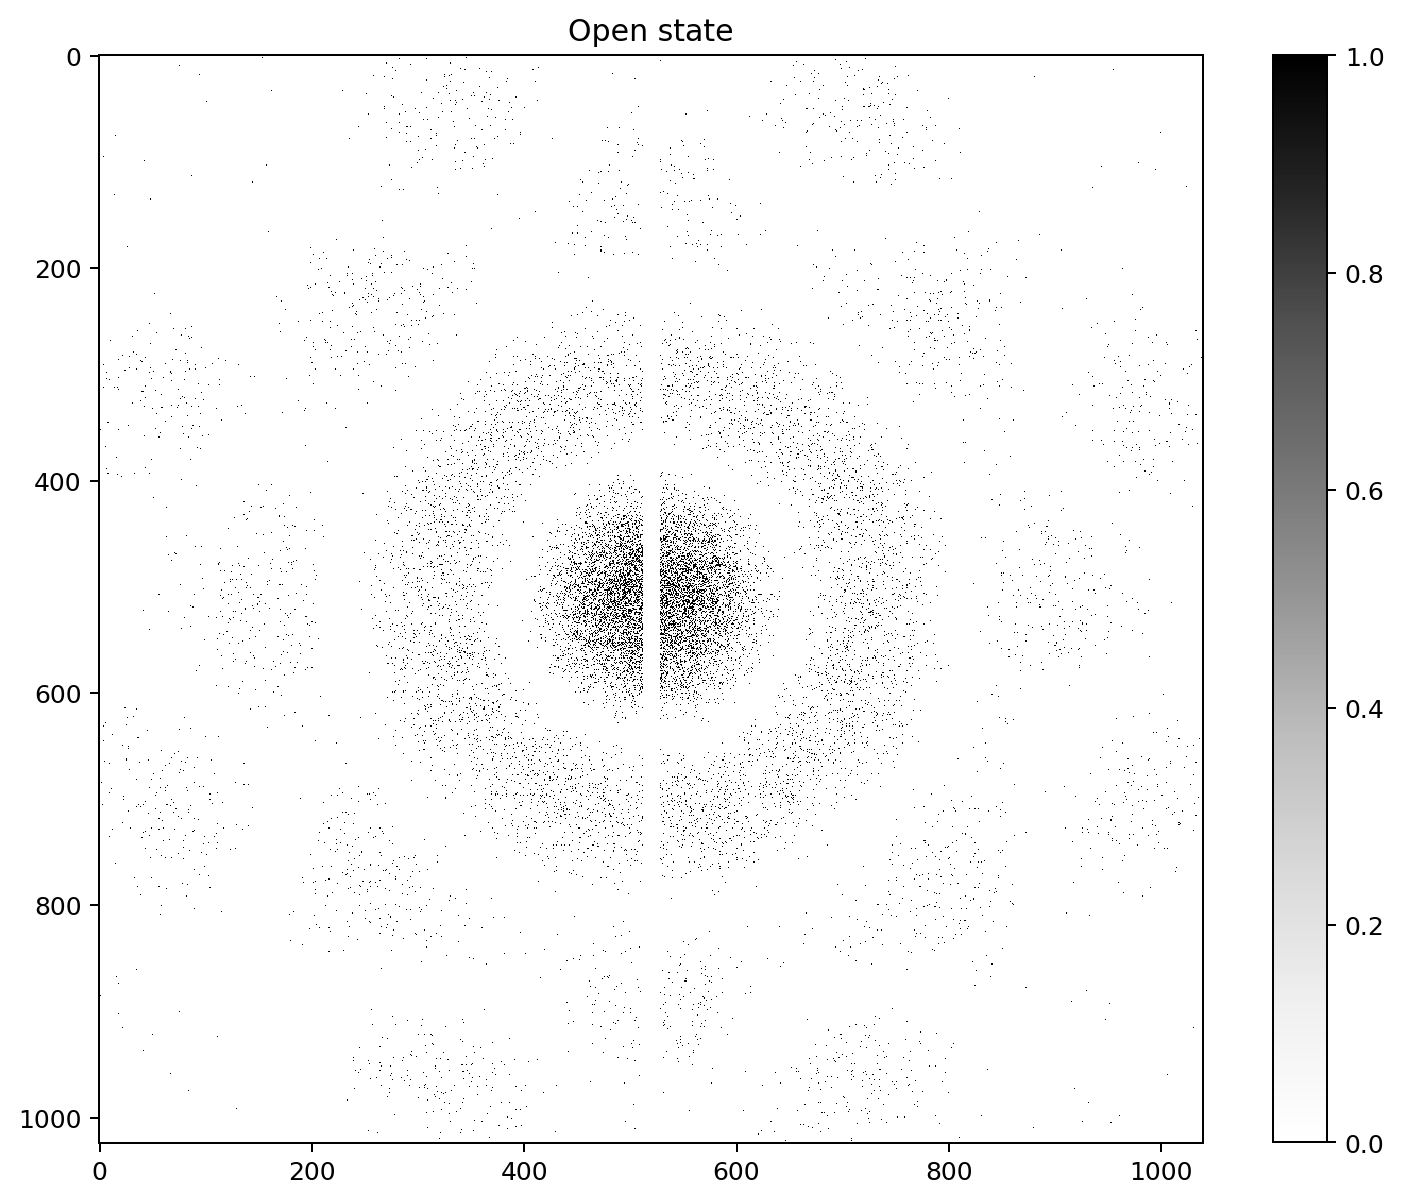

In [8]:
fig = plt.figure(figsize=(10, 8), dpi=180)
plt.imshow(det.assemble_image_stack(patternOp),vmin=0, vmax=1, cmap='Greys')
plt.colorbar()
plt.title('Open state')
plt.show()

In [20]:
wave = det.get_pattern_without_corrections(particle=particleOp, return_type='complex_field')

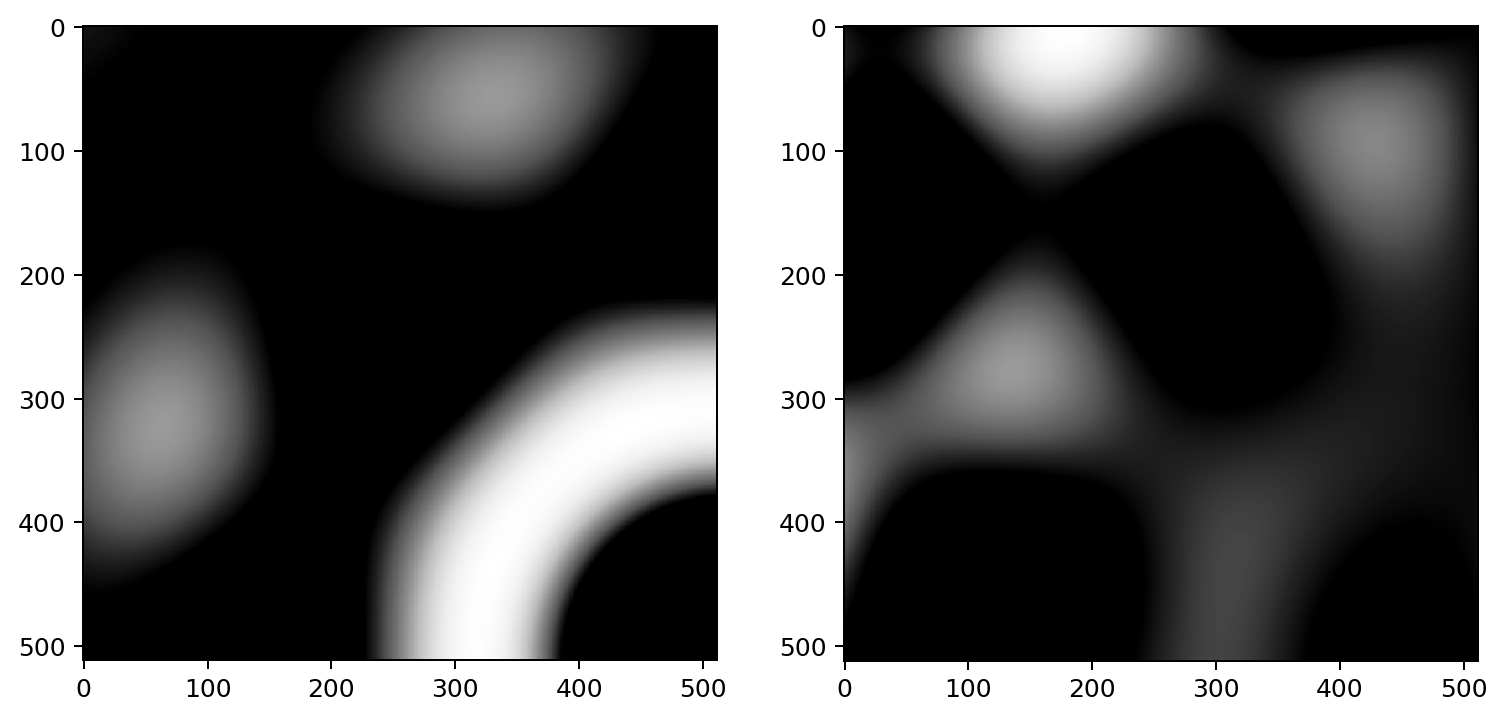

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=180)
axes[0].imshow(np.real(wave[0,...]), cmap='Greys', vmax=2)
axes[1].imshow(np.imag(wave[0,...]), cmap='Greys', vmax=2)
plt.show()

In [39]:
os.getcwd()

'/reg/neh/home5/fpoitevi/Toolkit/pysingfel/notebooks'